# Práctica 1: Introducción al *shell* de Linux. Bash

## Introducción 
El shell de Linux es una interfaz de línea de comandos (CLI, *command line interface*) que permite a los usuarios interactuar con los servicios del sistema operativo mediante la escritura de órdenes textuales. Es una parte esencial de la experiencia de uso de Linux y proporciona un control poderoso sobre el sistema.

Bash, abreviatura de "Bourne Again Shell," es uno de los shells más populares y ampliamente utilizados en sistemas Linux y Unix. Fue creado como una extensión y mejora del shell original de Unix, el Bourne Shell (sh), y se ha convertido en el estándar de facto en la mayoría de las distribuciones de Linux.

Bash ofrece una amplia gama de capacidades, que incluyen:

1. **Interfaz de usuario de línea de comandos:** Los usuarios pueden interactuar con el sistema escribiendo comandos directamente en la terminal. Esto permite realizar tareas como la navegación por el sistema de archivos, la gestión de archivos y directorios, la administración de procesos y más.

2. **Scripting:** Bash es un lenguaje de scripting poderoso que permite a los usuarios escribir secuencias de comandos (scripts) para automatizar tareas repetitivas o realizar tareas más complejas. Esto es especialmente útil en la administración de sistemas y la automatización de tareas.

3. **Variables y control de flujo:** Bash permite definir y utilizar variables para almacenar información, así como controlar el flujo de ejecución de los comandos mediante estructuras de control como bucles y condicionales.

4. **Redirección y tuberías (pipes):** Los usuarios pueden redirigir la entrada y salida de comandos, lo que permite la manipulación de flujos de datos y la creación de flujos de trabajo complejos mediante la tubería de comandos.

5. **Personalización:** Los usuarios pueden personalizar su entorno de shell mediante la configuración de archivos de inicio para establecer variables de entorno, definir alias y personalizar el aspecto y el comportamiento de la terminal.

6. **Historial de comandos:** Bash mantiene un historial de comandos previamente ejecutados, lo que facilita la repetición de comandos anteriores o la búsqueda de comandos específicos.

En resumen, el shell de Linux, en particular Bash, es una herramienta esencial para trabajar ya que proporciona a los usuarios un control versátil y eficiente, adecuada tanto para tareas simples como para la automatización de procesos complejos. A medida que te familiarices con el shell, descubrirás su potencial para aumentar tu productividad y eficiencia en la programación en entornos Linux.

## Organización del sistema de ficheros en Linux

En Linux, todo el conjunto de dispositivos de almacenamiento (discos, etc.) es considerado como un único sistema de ficheros jerárquico que parte desde el **directorio raíz** (`/`). No existen, por tanto, las unidades lógicas (C:, etc.) que usa Windows.
Linux organiza el espacio en disco en subdirectorios con permisos y privilegios propios de cada usuario. Los ficheros y directorios se organizan jerárquicamente a partir de su directorio raíz (`/`) con una estructura predeterminada que se muestra en la siguiente imagen, que merece la pena recordar y respetar para encontrar aplicaciones, bibliotecas, archivos de configuración, datos de usuario y demás tipos de archivos con rapidez y eficacia.

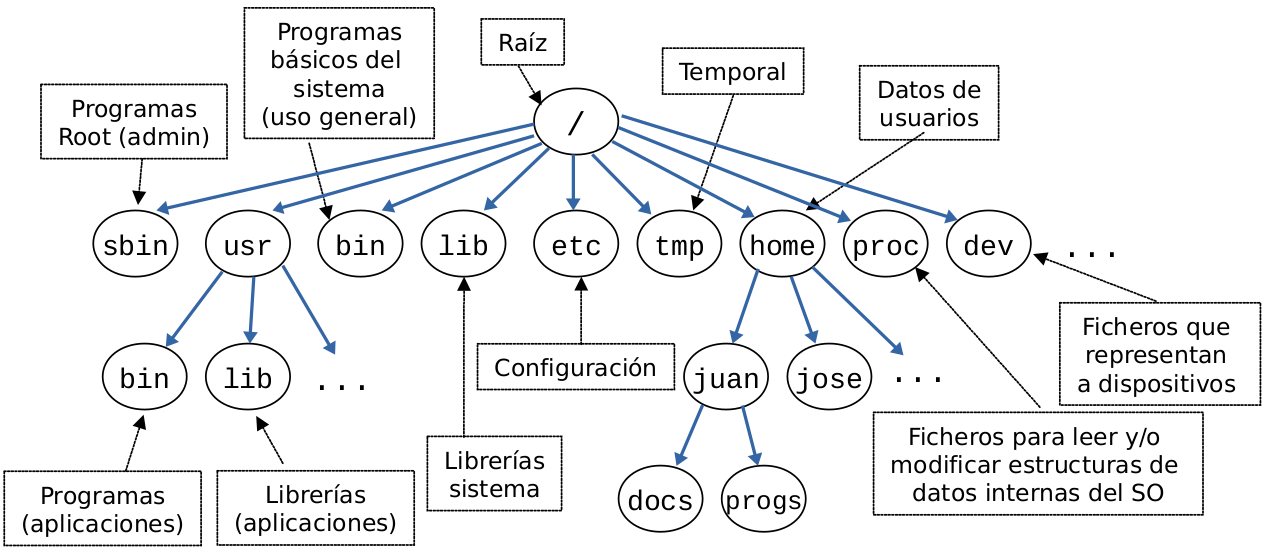

### <span style="color: blue;">EJERCICIO</span>

Navega por el sistema de ficheros en la interfaz gráfica para familiarizarte con el árbol de directorios.

Lanza el explorador de archivos a través de la interfaz gráfica de usuario. Si tu entorno de escritorio de Linux es GNOME, busca y ejecuta la aplicación `Archivos`; en realidad, el nombre de dicho programa explorador de archivos es `nautilus`. Puedes probar también a lanzarlo desde este *notebook*, ejecutando la siguiente  celda.

In [1]:
nautilus

Navega por los diferentes directorios del sistema de ficheros usando el ratón. Hazlo también usando exclusivamente el teclado: muévete entre los elementos del directorio actual con las teclas de dirección, usa INTRO para acceder al directorio seleccionado y RET (retroceso/borrar) para salir del mismo. En particular, navega hasta el directorio `/etc/X11` y luego hasta `/usr/include`. 

Comprueba que el árbol de directorios es similar al mostrado en la figura anterior: el directorio `/` es la raíz del árbol de directorios, por lo que no es posible retroceder más allá de ese punto en el sistema de ficheros. De él *cuelgan* todos los directorios de primer nivel, tales como `usr`, `etc` o `home`. 
* Entra dentro de `usr` y trata de borrar alguno de los directorios de contiene, por ejemplo, `bin`. ¿Puedes?
* Entra dentro de `home` y averigua a partir de sus subdirectorios los nombres de los usuarios del sistema que estás usando. 
    * Si estás en un PC del laboratorio, tendrás al menos un subdirectorio en `home` llamado `alumno`, que es el nombre de usuario de la cuenta que estás utilizando.
* Si entras dentro de `/home/alumno` (o el directorio correspondiente a tu cuenta de usuario) verás directorios tales como `Descargas`, `Escritorio`, etc. Este es tu directorio personal, donde el usuario `alumno` puede colocar sus ficheros y manipularlos a su antojo sin restricciones (puede crear, borrar, etc.).
* Finalmente, localiza el directorio que contiene este fichero de *notebook*.

A continuación, ejecuta la aplicación `Terminal` (búscala después de hacer clic en `Actividades`). Si estás usando GNOME, prueba también a lanzarlo desde este notebook ejecutando la siguiente celda:

In [2]:
gnome-terminal

La ventana que se ha abierto ante ti es el `shell` de Linux, una poderosa y versátil herramienta que vamos a aprender a utilizar a lo largo de las prácticas de esta asignatura.

**RECOMENDACIÓN**: A partir de este momento, es recomendable que utilices una disposición de ventanas como la que se muestra en la siguiente imagen, de forma que te permita ver tanto este *notebook* como el terminal. Así podrás ir escribiendo los comandos en el terminal al tiempo que lees las indicaciones del *notebook*.

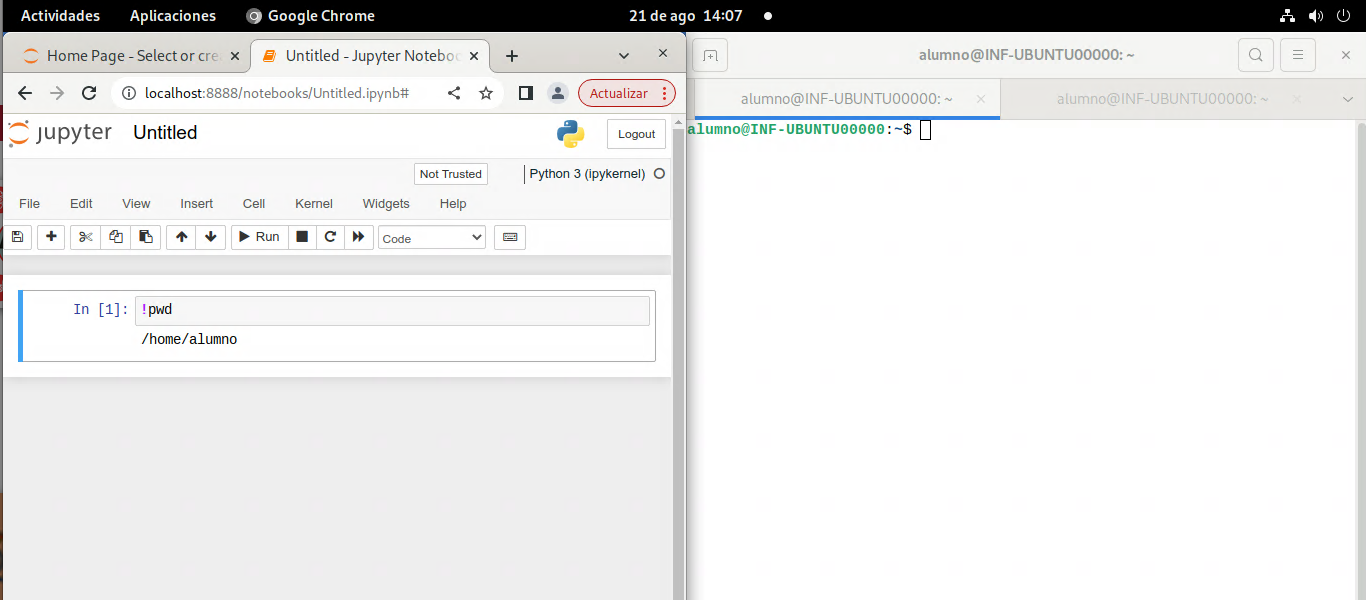

## El *prompt*

La interfaz que ofrece el shell permite al usuario introducir comandos para utilizar los servicios del sistema operativo. La línea de comandos está indicada por lo que se conoce como *prompt*, que no es más que el conjunto de caracteres que muestra el intérprete de comandos para anunciar que se encuentra a la espera de que el usuario introduzca la siguiente orden, que será ejecutada a continuación. El shell suele mostrar un *prompt* como el que vemos en la siguiente imagen:

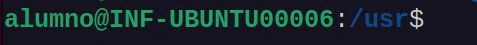

donde:
- `alumno` es el nombre del usuario conectado al sistema que hace uso del shell.
- `INF-UBUNTU00006` sería el nombre del computador que se está usando.
- `/usr` es el directorio de trabajo actual, explicado a continuación.

Como vemos, el prompt del shell nos indica en todo momento el directorio de trabajo donde estamos situados, que puede verse
como el lugar de partida por defecto a la hora de ejecutar el siguiente comando, tal y como veremos a continuación.



## El directorio de trabajo actual

Un concepto importante que es necesario comprender desde el comienzo es que el shell tiene una noción de una
**ubicación por defecto** en la que tendrá lugar cualquier operación con ficheros: el directorio de trabajo actual. 

Si intentas crear nuevos ficheros o directorios, ver ficheros existentes o incluso borrarlos, el shell asumirá que los estás buscando en el directorio de trabajo actual, a menos que especifiques lo contrario. Por lo tanto, es muy importante
tener siempre presente en qué directorio se encuentra el shell en cada momento.


Si alguna vez tienes dudas, el comando `pwd` te dirá exactamente cuál es
el directorio de trabajo actual del shell (pwd es la abreviatura de “print working directory”, imprimir el directorio de trabajo). 

No obstante, lo normal es que el prompt del shell muestre el directorio de trabajo actual (en la imagen anterior era `/usr`). Por ello, una vez que te acostumbres a tener presente dónde te encuentras en cada momento cuando estés usando el terminal, raramente necesitarás ejecutar el comando `pwd`. Sin embargo, en un *notebook* `pwd` sí resulta en ocasiones útil ya que carecemos de un prompt que nos indique en cada instante *dónde* nos encontramos.

Por otro lado, es importante tener presente que en Linux cualquier proceso en ejecución tiene la noción de su  directorio de trabajo actual, aunque no se trate de un terminal del *shell*. Así, por ejemplo, si lanzaste a ejecución este *notebook* haciendo doble-clic en el fichero, en este punto probablemente tengas como directorio de trabajo actual el directorio donde se encuentra el fichero del *notebook*.

In [ ]:
pwd # print working directory

### <span style="color: blue;">EJERCICIO</span>

Ejecuta la siguiente celda (el comando `touch` se puede utilizar para crear ficheros vacíos). A continuación, abre el explorador de archivos y navega por los directorios del sistema de ficheros hasta localizar el fichero creado, llamado `vacio`. La información mostrada por el comando `pwd` anterior puede serte útil a la hora de localizar la ubicación del fichero creado.

In [3]:
touch vacio

Cuando hayas localizado el directorio donde está el fichero, ejecuta la siguiente celda (`ls` se usa para listar el contenido de directorios; por defecto, el directorio actual). Compara la salida producida por `ls` con lo que ves en la ventana de explorador de archivos anterior.

In [ ]:
# ls: listar el contenido de directorio
# (por defecto, el directorio actual)
ls

¿Qué conclusiones sacas de todo lo anterior?

RESPUESTA:

### Cambiando de directorio de trabajo

Para movernos de un directorio a otro desde el *shell*, es decir, para cambiar el directorio de trabajo actual, utilizamos el comando `cd`:

* ```cd ruta_directorio```: Nos mueve de nuestro directorio actual al indicado por la ruta dada.
* ```cd ..```:  Nos mueve al directorio padre del actual en el árbol de directorios.
* ```cd```:  Nos mueve al directorio de inicio del usuario.
* ```cd -``` : Nos mueve al directorio último en el que habíamos estado con anterioridad al actual.

Ejecuta las siguientes celdas, observando cómo cambia el directorio de trabajo actual. Luego, abre un terminal del *shell* y repite de nuevo los mismos comandos, observando cómo cambia el *prompt* tras cada cambio de directorio.

Por ejemplo, podemos cambiarnos al directorio `/usr`así:

In [ ]:
cd /usr # cambia al directorio "/usr"

In [ ]:
pwd

Para ir al directorio de inicio del usuario (directorio a partir del cual se suelen ubicar los ficheros de dicho usuario), basta con ejecutar el comando `cd` sin argumentos:

In [ ]:
cd # # cambia al directorio del usuario

In [ ]:
pwd

In [ ]:
cd - # # cambia al directorio en el que estábamos antes del último cambio  (/usr)

In [ ]:
pwd

In [ ]:
cd .. # # cambia al directorio padre del actual (/)

In [ ]:
pwd

### <span style="color: blue;">EJERCICIO</span>

Ahora, vuelve a navegar por el sistema de ficheros pero esta vez desde el shell en vez de a través del entorno gráfico. 

En la ventana del terminal que acabas de abrir, ve cambiando de directorio hasta llegar a los mismos directorios mencionados en el ejercicio anterior: 
* Debes llegar, avanzando o retrocediendo de nivel en nivel (con `cd nombredir` o `cd ..`), hasta llegar al directorio `/etc/X11`, y finalmente mostrar su contenido.
* Luego debes cambiarte de la misma forma hasta `/usr/include` y hacer lo propio. 
* Finalmente, regresa al directorio donde está este notebook.

Te habrás dado cuenta de lo útil que resulta que el *prompt* muestre en todo momento cuál es tu directorio de trabajo actual. 

Navegar por el sistema de ficheros dentro de un *notebook* resulta menos intuitivo que hacerlo en un terminal, al carecer de prompt, por lo que resulta conveniente que tras cada comand `cd`, ejecutes el comando `pwd` para visualizar exactamente en qué punto del árbol de directorios te encuentras.

In [ ]:
# Muestra en qué directorio te encuentras


In [ ]:
# Deberías estar en el directorio raíz (/).
# Si no lo estás, cámbiate al mismo con "cd /"


In [ ]:
# Lista el contenido del directorio actual


In [ ]:
# Cambia al directorio etc


In [ ]:
# Una vez dentro de etc, entra en el directorio X11


In [ ]:
# Muestra con pwd cuál es el directorio actual 


In [ ]:
# Deberías estar en /etc/X11.
# Si no lo estás, puedes cambiarte "en un paso" con "cd /etc/X11"


In [ ]:
# Entra directamente en el directorio /usr/include/X11


In [ ]:
# Muestra el contenido del directorio actual


In [ ]:
# Muestra el contenido del directorio /etc/X11
# (sin necesidad de cambiar de directorio)


Observa tras la realización de este ejercicio, una de las ventajas de usar el *shell* frente a la interfaz gráfica: su **eficiencia y velocidad**. Con el shell, puedes navegar por el sistema de archivos utilizando comandos de texto, lo que a menudo es más rápido que hacer clic en carpetas y ventanas en una GUI. Además, con el shell puedes escribir comandos específicos para realizar tareas directamente (en el ejemplo, lanzar el explorador de ficheros `nautilus`), en lugar de buscar y hacer clic en menús y opciones en una GUI.

## El directorio de usuario 

En Linux, como en otros sistemas operativos multiusuario, cada usuario posee un **directorio de usuario**, a veces también llamado
**directorio personal** o **directorio de inicio**, en el que poder almacenar sus propios ficheros. Lo habitual es que,
dentro del directorio `/home`, cada usuario tenga un subdirectorio llamado como el propio nombre de usuario (p.ej., el usuario `alumno` tendrá su directorio personal en `/home/alumno`. Para referirnos al directorio personal, a menudo lo haremos diciendo que es “su directorio *home*”, lo cual no debe confundirse con el directorio `/home` (leído “barra home”), que alberga los datos de todos los usuarios.

El carácter ~ es sinónimo de la ruta abosluta a nuestro *home* o directorio personal, de forma que siempre que estemos dentro del mismo, el prompt mostrará como directorio de trabajo actual una ruta que empieza por ~.

### <span style="color: blue;">EJERCICIO</span>

Para este ejercicio, utiliza la **ventana del terminal** que abriste anteriormente, en vez de este notebook. 

Navega por el directorio de usuario y alrededores mediante el comando `cd`, siguiendo las indicaciones que tienes a continuación y mostrando el contenido de cada directorio al que acabes de acceder.

Una vez hayas practicado en el terminal, introduce el comando adecuado en las siguientes celdas del notebook.

In [ ]:
# Observa en el prompt cuál directorio actual (muestra con pwd)


In [ ]:
# Cambia al directorio de usuario con `cd`
# y vuelve a observar el prompt.


In [ ]:
pwd

In [ ]:
# Cambia al directorio Descargas dentro del directorio de usuario. Observa el prompt y ejecuta pwd


In [ ]:
pwd

In [ ]:
# Cambia al directorio /home 


In [ ]:
pwd

In [ ]:
# Lista el contenido del directorio actual
ls

In [ ]:
# Una en  /home, ejecuta esta celda
# Nota: el comando touch crea un fichero vacío
touch ficherovacio

Observa qué es lo que ha ocurrido al ejecutar la celda anterior y razona por qué. 

RESPUESTA:

## Rutas absolutas y relativas

La ruta a los directorios o los ficheros que los comandos necesitan se puede indicar por medio de su ruta absoluta
(cualquiera de las que parten del directorio raíz) o por medio de una ruta relativa (cualquiera de las que parten del directorio de trabajo actual). 
* Una **ruta absoluta** comienza por lo general con la barra inclinada (carácter `/`), aunque las rutas que comienzan por ~ son también absolutas, ya que ‘~’ es en realidad una abreviatura del directorio personal del usuario `/home/usuario`).
* Por contra, las **rutas relativas** suelen comenzar directamente por el nombre del fichero o subdirectorio dentro del directorio actual al que nos referimos. En el caso de que necesitemos referirnos mediante una ruta relativa a un fichero/directorio que no esté contenido en el directorio de trabajo actual (ni directamente ni tampoco en ninguno de sus subdirectorios), es posible referirnos al directorio padre a uno dado mediante un par de puntos seguidos de la barra (caracteres `../`), lo cual se puede repetir cuantas veces sea necesario para subir niveles en el árbol de directorios. 
* Una ruta relativa también puede comenzar con el punto y la barra (caracteres `./`) para hacer referencia al directorio actual, aunque esto resulta innecesario por estar implícito, salvo en casos muy concretos que veremos en posteriores boletines de prácticas. 

He aquí algunos ejemplos de rutas absolutas y relativas, representadas gráficamente en la figura que aparece más abajo (cada ejemplo corresponde a una flecha roja etiquetada con su número):

1. Ejemplo de ruta absoluta al directorio `/usr/lib`:

    `/usr/lib/`

2. Ejemplo de ruta absoluta al fichero `fich.txt` en el directorio `docs` bajo el directorio del usuario `juan`:

    `/home/juan/docs/fich.txt`

3. Ejemplo de ruta relativa al fichero `fich.txt` desde el directorio `progs`:

    `../docs/fich.txt`

4. Ejemplo de ruta relativa al directorio `progs` desde el directorio `juan`:

    `./progs/`

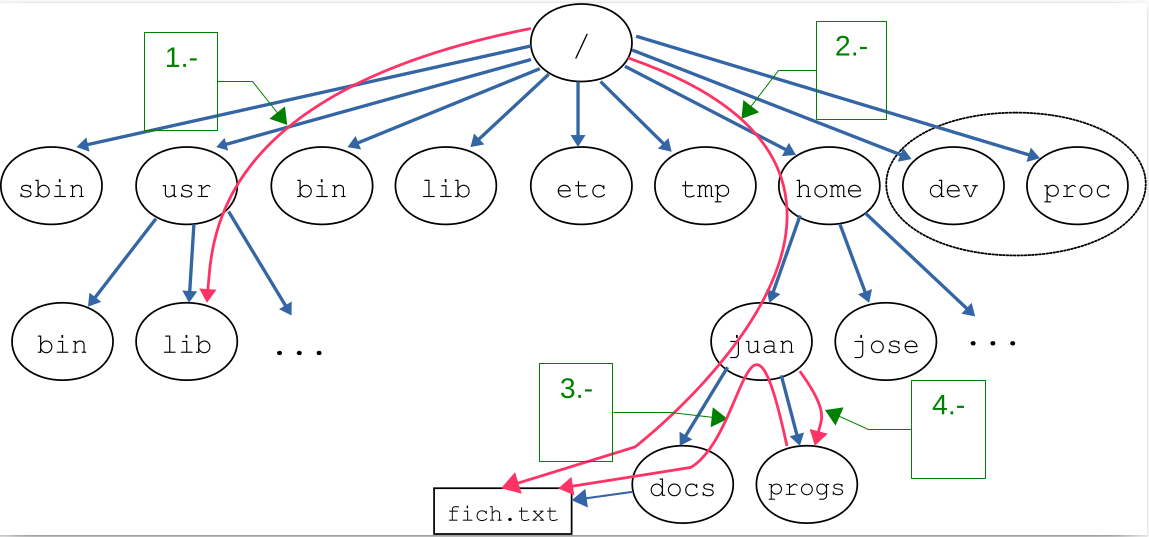

In [ ]:
# Cambiamos mediante ruta absoluta al directorio /usr
cd /usr

In [ ]:
pwd # Ahora estamos en /usr

In [ ]:
# Mostramos el contenido del directorio actual
ls

In [ ]:
# Listamos el directorio "include" mediante una ruta relativa
# Recuerda: estamos en /usr, que es el "padre" de include
ls include

In [ ]:
# Con la opción `-l` del comando `ls`,  listamos detalladamente
# el fichero `sudo_plugin.h` que hay dentro del 
# subdirectorio `include`, (usando una ruta relativa):
ls -l include/sudo_plugin.h

In [ ]:
# Ruta absoluta para listar el fichero `sudo_plugin.h` 
# del ejemplo anterior:
ls -l /usr/include/sudo_plugin.h

In [ ]:
# Ruta relativa desde el directorio `/usr` para cambiar
# al directorio `/usr/bin`:
cd bin

In [ ]:
pwd # Ahora estamos en /usr/bin

In [ ]:
# Ruta relativa para cambiar al directorio /usr/local/etc 
# desde el directorio actual (`/usr/bin`):
cd ../local/etc

In [ ]:
pwd # Ahora estamos en /usr/local/etc

Por ejemplo, supongamos que el usuario alumno está en `/usr/local/etc` y quiere ir a `/home/alumno`.
El usuario, podrá cambiar a este directorio usando una ruta relativa o una absoluta:

In [ ]:
# Usando una ruta relativa:
cd ../../../home/alumno

In [ ]:
# Usando una ruta absoluta:
cd /home/alumno

In [ ]:
# Usando un "atajo"
cd

### <span style="color: blue;">EJERCICIO</span>

En las siguientes celdas, escribe **la ruta relativa** para cambiar (`cd`) al directorio indicado mediante su ruta absoluta, teniendo en cuenta en cada momento cuál es tu directorio de trabajo actual. 
- Después de cada `cd`, ejecuta `pwd` para ver la ruta absoluta del directorio actual.
- Recuerda que debes ejecutar las celdas en orden (ya que la ruta relativa depende del directorio actual en el que se encuentre el kernel del *notebook* en ese momento).
- Debes comenzar desde tu directorio de usuario, si no estás ya en él.

In [ ]:
pwd

In [ ]:
# /home


In [ ]:
pwd

In [ ]:
# /home/alumno/Escritorio


In [ ]:
pwd

In [ ]:
# /


In [ ]:
pwd

In [ ]:
# /proc


In [ ]:
pwd

In [ ]:
# /etc/init.d


In [ ]:
pwd

In [ ]:
# /etc/cups


In [ ]:
pwd

In [ ]:
# /etc/X11/fonts


In [ ]:
pwd

In [ ]:
# /home/alumno/Descargas


In [ ]:
pwd

## Sintaxis general de un comando

La gran mayoría de comandos del shell sigue una sintaxis similar, que puede resumirse en tres partes claramente
diferenciadas: orden, opciones y argumentos. El nombre de la orden o comando es el único campo obligatorio,
mientras que las opciones y los argumentos son opcionales:

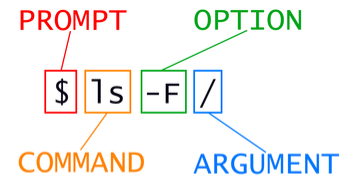

### Comando.

Se trata del nombre de la orden propiamente dicha que damos al *shell*. Los nombres de los comandos en el shell, como `cp` (copiar) y `mv` (mover), a menudo son abreviaturas que se derivan de las palabras clave o acciones que realizan. Estos nombres fueron elegidos en su mayoría para que fueran cortos y fáciles de escribir, lo que es beneficioso en un entorno de línea de comandos donde la eficiencia es importante. Además, se eligieron palabras clave que representan claramente la función principal de cada comando, lo que facilita su comprensión y uso.

Los comandos introducidos se dividen en dos clases:
 * **Comandos internos**. Son aquellas órdenes propias del programa shell que son reconocidas y procesadas por el propio shell sin necesidad de recurrir a otro programa. Por ejemplo, el comando `exit` para terminar la sesión, o `cd` para cambiar de directorio, son comandos internos al shell.
 * **Comandos externos**. El shell actúa como "pasarela" para lanzar a ejecución otros programas (ficheros ejecutables) que hayan sido previamente instalados y estén disponibles en el sistema, tales como `ls`, `rm` o `firefox`. El intérprete de comandos buscará estos ficheros ejecutables en ciertos directorios por defecto (como veremos más adelante, según el PATH). Cualquier aplicación instalada en el sistema, sin importar si hace uso de la CLI o la GUI, se puede ejecutar desde la línea de comandos.

### Opciones.
Las opciones sirven para modificar el comportamiento del comando. 
- Las opciones suele ir a continuación del nombre del comando, antes de los argumentos. 
- Pueden ponerse en cualquier orden y pueden agruparse, pero siempre antes de los argumentos de la orden.
- En la mayoría de comandos, con contadas excepciones, las opciones se suelen indicar bien mediante un guión y una letra (p.ej. `-r`), bien mediante doble guión y una palabra descriptiva (p.ej. `--recursive`). Es común encontrar comandos que aceptan ambas formas, abreviada y verbosa, para cada opción.
```
ls -a -l -h = ls -lha = ls -l --all --human-readable
```

### Argumentos.
Van al final de la orden, tras las opciones si las hubiese. 
- Un gran número de comandos de manipulación de ficheros admite un número variable de argumentos, incluso arbitrariamente grande. Por ejemplo, comandos como `cp` (copiar) o `rm` (eliminar) pueden operar sobre miles de archivos de una vez, gracias a los *comodines* (lo veremos en siguientes boletines de prácticas).
- En los comandos de manipulación del sistema de ficheros, las argumentos son rutas a ficheros o directorios.
- En caso de comandos que no requieren obligatoriamente un número mínimo de argumentos, suele tomarse el directorio de trabajo actual como argumento implícito (p.ej., si a `ls` no se le pasa ningún argumento, mostrará el contenido del directorio de trabajo actual).

### <span style="color: blue;">EJERCICIO</span>

Practica la sintaxis general de un comando y sus opciones. Para ello, utilizaremos `ls`, el comando usado para listar el contenido de un directorio.

In [ ]:
# Sitúate en el directorio de usuario


In [ ]:
# Crea un fichero con `touch` llamado `prueba`


In [ ]:
# Ejecuta el comando ls sin opciones ni argumentos.


In [ ]:
# Ejecuta el comando ls con la opción -l (lista)


¿Cuál es el tamaño del fichero `prueba`?

RESPUESTA: 

In [ ]:
# Ejecuta el comando ls con la opción -a.


¿Qué ficheros adicionales aparecen? 

RESPUESTA:

¿Qué tienen en común?

RESPUESTA:


In [ ]:
# Ejecuta el comando ls con ambas opciones


In [ ]:
# Ejecuta el comando ls pasando 
# como argumento el directorio /usr. 


In [ ]:
# Ejecuta el comando ls (una vez) pasando 
# como argumento los directorios /usr, /opt y /home 


In [ ]:
# Ejecuta el comando ls (una vez) para listar el contenido de 
# Descargas y el directorio /usr (usa rutas relativas)


In [ ]:
# Lista detalladamente el fichero .bash_history
# usando la opción -h para mostrar su tamaño de forma más legible


¿Cuál es el tamaño del fichero `.bash_history`?

RESPUESTA:

## Autocompletar rutas mediante la tecla tabulador

Una de las características más interesantes de cualquier shell moderno es la capacidad de autocompletar mediante
la pulsación tecla del tabulador, Tab . Una vez acostumbrados a utilizar esta funcionalidad clave del shell, veremos dramáticamente **incrementada nuestra productividad** al ahorrar miles de pulsaciones de teclado diariamente. 

En función de la posición en que nos encontremos dentro de la estructura general de un comando (nombre del comando
vs. argumentos), la pulsación del tabulador tratará de autocompletar bien el nombre del comando (por ejemplo,
buscando entre los programas instalados disponibles) o bien la ruta a los ficheros/directorios que buscamos pasar
como parámetros al comando.

Así, al presionar `Tab` el shell completará la ruta cuando hayamos escrito suficientes caracteres de ésta como para poder distinguir una ruta de otras que comiencen por los mismos caracteres. En caso de ambigüedad, no será posible autocompletar por completo el nombre del fichero/directorio, sino sólo los caracteres que constituyen el prefijo común.

Presionando dos veces seguidas, el shell mostrará las posibles rutas cuyo nombre empiece por los caracteres que ya hemos tecleado, de forma que sólo tendremos que teclear los caracteres adicionales para eliminar la ambigüedad y después volver a presionar Tab para autocompletar el resto del nombre.

### <span style="color: blue;">EJERCICIO</span>

Practica a usar el tabulador en las siguientes celdas del *notebook* para autocompletar rutas a ficheros o directorios, así como nombres de comandos (programas instalados).

Recuerda que, tras seleccionar la palabra adecuada del desplegable, debes pulsar TAB o INTRO para autocompletar.

In [ ]:
# Cambia al directorio de usuario


In [ ]:
# Lista el contenido del directorio actual


In [ ]:
# Escribe ls E (e mayúscula) y presiona el tabulador, 
# debería autocompletar "Escritorio".


In [ ]:
# Escribe libr y presiona el tabulador para autocompletar
# (debería autocompletar "libreoffice")

In [ ]:
# Escribe cd D (d mayúscula) y presiona el tabulador para
# autocompletar (te debería dar la alternativa entre
# "Descargas" y "Documentos")


In [ ]:
# Escribe cd De y presiona el tabulador para autocompletar
# (debería autocompletar "Descargas")


Regresa a la ventana del terminal y prueba de nuevo a practicar el uso del tabulador en el shell repitiendo los mismos ejercicios. 

* Fíjate en que, al contrario que en los *notebooks* (donde aparece un desplegable), cuando existe ambigüedad al autocompletar con TAB, el shell te muestra de manera textual las alternativas que existen para el prefijo del nombre que has escrito hasta ese momento (además de sonar la campana del terminal, si está configurado de esa manera).
    - Al teclear más caracteres y volver a presionar TAB se van eliminando alternativas hasta que no hay ambigüedad.
    - Cuando no hay ambigüedad, el nombre íntegro del fichero/directorio se autocompleta directamente.

## Comandos básicos de manejo de ficheros

El terminal de Linux nos ofrece muchas posibilidades de listado y manejo de ficheros y directorios de un modo
más personalizado que un interfaz gráfico. Por ahora, vamos a aprender los comandos más básicos:
* `ls` : Lista el contenido del directorio actual.
* `touch FICHERO` : Crea un nuevo fichero vacío en la ruta indicada, en caso de que no exista. En otro caso, le cambia la fecha y hora de modificación a la actual sin modificar su contenido.
* `cat FICHERO ...` : Muestra el contenido completo de los ficheros indicados.
* `less FICHERO ...` : Muestra el contenido de los ficheros indicados, con la opción de avanzar y retroceder.
* `rm FICHERO ...` : Borra los ficheros indicados. También puede utilizarse para borrar directorios, para lo cual se usa la opción `-r`.
* `cp FICHERO DIRECTORIO` : Copia el fichero origen indicado al directorio destino, que debe existir previamente.
* `mkdir DIRECTORIO` : Crea un directorio vacío en la ruta designada.
* `rmdir DIRECTORIO` : Borra el directorio indicado, siempre que esté vacío. Si no, hay que borrar primero
todas sus entradas, o bien simplemente usar el comando rm con la opción `-r` (borrado recursivo).

Para finalizar, dejamos aquí un listado misceláneo de otros comandos de interés:
* `exit` : Sale del *shell* actual.
* `date` : Devuelve la fecha y la hora actuales.
* `clear` : Limpia el terminal.
* `reset` : Resetea el terminal (*esto es útil si el terminal se queda en un estado "inestable" mostrando caracteres extraños, lo cual ocurre, por ejemplo, tras hacer `cat` de un fichero que no contiene caracteres sino que es un fichero binario*).

### <span style="color: blue;">EJERCICIO</span>

Vamos a practicar a continuación algunos de los comandos básicos anteriores, combinando con los conceptos aprendidos en este boletín sobre rutas relativas, sintaxis de un comando, etc.

In [ ]:
# Cambia el directorio de usuario


In [ ]:
# Muestra el contenido del fichero /etc/hostname


In [ ]:
# Muestra el contenido del fichero .bash_history, de forma
# que puedas avanzar y retroceder

In [ ]:
# Lista el contenido del directorio Descargas (sin entrar en él)


In [ ]:
# Crea dos directorios (con un solo comando),
# uno llamado "descargas" y otro "dir1"


In [ ]:
# Lista el contenido del directorio actual

¿Qué deduces acerca del uso de mayúsculas y minúsculas en Linux?

RESPUESTA: 

In [ ]:
# Entra en el directorio `dir1` que acabas de crear


In [ ]:
# Crea un fichero vacío llamado "hola"


In [ ]:
# Haz un listado que muestre los detalles del fichero hola

¿Cuál es el tamaño del fichero `hola`?

RESPUESTA:

In [ ]:
# Abre el fichero con el editor de texto, 
# escribe "hola", guárdalo y vuelve a listar sus detalles


¿Cuál es ahora el tamaño del fichero `hola`?

RESPUESTA: 

In [ ]:
# También puedes abrir el fichero con el editor
# directamente desde el shell. Si tu editor es gedit, haz:
gedit hola

In [ ]:
 # Regresa al directorio padre


In [ ]:
# Intenta borrar el directorio `dir1` usando rmdir


¿Qué ocurre?

RESPUESTA: 

In [ ]:
# Sin cambiar de directorio, borra el fichero "hola" 
# que acabas de crear (utiliza una ruta relativa)


In [ ]:
# Intenta borrar de nuevo el directorio `dir1` con rmdir


In [ ]:
# Crea un fichero vacío llamado "adios" dentro de "descargas"
# (sin cambiar de directorio)


In [ ]:
# Borra el directorio "descargas" de forma 
# que se borre junto con todo lo que tiene dentro


## Mi primer guión *shell* de *Bash*

Un guión shell de Bash es un fichero de texto que contiene una secuencia de comandos escritos en el lenguaje del shell Bash. Estos guiones shell (en inglés, *shell scripts*) están diseñados para ser ejecutados en un intérprete de Bash y se utilizan para automatizar tareas, administrar sistemas y realizar diversas operaciones en sistemas Unix y Unix-like, como Linux. Son útiles para tareas como la manipulación de ficheros, el procesamiento de texto, la administración de procesos y la automatización de flujos de trabajo. Aunque Bash no es un lenguaje de programación completo y general como Python, C++ o Java, tener unas nociones básicas de programación de scripts del shell (*shell scripting*) resulta muy valioso para la automatización de tareas, también en el ámbito de la Ciencia de Datos.

Como primer ejemplo, vamos a crear un guión shell que simplemente imprime por pantalla el mensaje "¡Hola, Mundo!". Para ello, abrimos un editor de texto cualquiera (por ejemplo, `gedit` es el editor de texto de GNOME), pegamos el siguiente texto y finalmente lo guardamos con el nombre "hola.sh" en la misma carpeta donde se encuentra este notebook:
```bash
#!/usr/bin/bash

# Esto es un comentario 
echo ¡Hola, Mundo!
```

In [ ]:
gedit hola.sh

Para ejecutar un shell script, puedes sencillamente invocar al programa intérprete específico, pasándole como argumento la ruta al fichero del *shell script*. Por ejemplo, si tienes un script llamado "mi_script.sh", puedes ejecutarlo así:

```bash
bash mi_script.sh
```

Esto le dice al programa Bash (el intérprete de comandos de shell) que tome el fichero "mi_script.sh" y ejecute línea a línea los comandos que contiene. Del mismo modo, si fuera un script de Python, podrías hacer lo siguiente:

```bash
python mi_script.py
```
Así pues, podemos ejecutar nuestro primer script `hola.sh` de la siguiente forma:

In [ ]:
# Ejecutamos el script 
bash hola.sh

Y vemos resultado de la ejecución (mensaje por pantalla).

A lo largo del cuatrimestre aprenderemos a crear *scripts* progresivamente más complejos y útiles, que ilustren cómo automatizar tareas de procesamiento de datos, etc.

Por ahora, es suficiente con que sepas que los comandos de bash, además de escribirlos directamente en  *shell*, se pueden combinar en un fichero de texto llamado *script* o *guión shell*, para así poder re-ejecutarlos posteriormente tantas veces como queramos.